# Regions for certain epochs

In this notebook we show the regions computed for a number of epochs from the training explained in [this notebook](data_and_model.ipynb).

In [1]:
import torch.nn as nn 
import torch
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import pickle

# Useful function to convert tensors to numpy arrays
def to_np(x):
    return x.cpu().detach().numpy()
def to_tensor(x):
    return torch.tensor(x, dtype=torch.float32)

## Data
We need the same data, so we recompute it using the same random seeds.

In [2]:
# Random seeds
training_seed = 42
test_seed = 78

# Generate training data
X_train, y_train = make_moons(n_samples=1000, noise=0.1, random_state=training_seed)
X_train, y_train = to_tensor(X_train), to_tensor(y_train)

# Generate test data with random data
X_test, y_test = make_moons(n_samples=1000, noise=0.1, random_state=test_seed)
X_test, y_test = to_tensor(X_test), to_tensor(y_test)

## Polytopes

The polytopes for each epoch is precomputed and stored in the dictionary `dict_of_polytopes`, which we can load as follows:

In [3]:
# Load the state dicts
with open('../polytope_dict.pkl', 'rb') as f:
    dict_of_polytopes = pickle.load(f)

The dictionary is indexed with `epochX` for epoch X, which will give a list of arrays, each array is a polytope defined from its vertices. We can extract this information from the dictionary:

In [4]:
epoch = 500
index = 4
assert f'epoch{epoch}' in dict_of_polytopes.keys(), f"Not computed for epoch {epoch}"
polytopes = dict_of_polytopes[f'epoch{epoch}']
print(f'{len(polytopes)} polytopes found for epoch {epoch}')
polytope_nr = polytopes[index]
print(f'Polytope nr {index} for epoch {epoch} has {len(polytope_nr)} vertices')
for i, vertex in enumerate(polytope_nr):
    print(f'Vertex {i}: {vertex}')

45 polytopes found for epoch 500
Polytope nr 4 for epoch 500 has 4 vertices
Vertex 0: [1.39907926 0.35254492]
Vertex 1: [1.59418956 0.38607708]
Vertex 2: [ 1.36198828 -1.99926065]
Vertex 3: [ 0.2329876  -0.74275012]


## Plot polytopes alongside data points

In [5]:
def plot_vertices(unique_vertices, epoch=None, show=True):
    bound = 2.5

    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(aspect='equal')
    patches = []
    num_polygons = len(unique_vertices)
    colors = [np.random.randint(1, 300) for i in range(num_polygons)]
    cmap = matplotlib.colormaps['rainbow']

    polytopes_within_boundaries = 0  # Counter for polytopes within boundaries


    # for i in range(num_polygons):
    for i in range(num_polygons):
        vertices_i = unique_vertices[i]
        
        # Check if any vertex falls within the boundaries
        vertices_within_boundaries = any(-bound <= coord[0] <= bound and -bound <= coord[1] <= bound for coord in vertices_i)
    #     clipped_vertices = clip_vertices(vertices_i.tolist(),bound)
        if vertices_within_boundaries:
            polygon = Polygon(xy=vertices_i,
                            closed=True,
                            facecolor=cmap(colors[i]),
                            edgecolor='black',
                            #   label=np.transpose(bit_string_list_from_alg[i])[0],
                            )
            ax.add_patch(polygon)
        
            patches.append(polygon)
            
            polytopes_within_boundaries += 1

    ax.set_xlim([-bound, bound])
    ax.set_ylim([-bound, bound])
    p = PatchCollection(patches, cmap=matplotlib.cm.gist_rainbow, alpha=0.8)
    colors = [np.random.randint(1, 1000) for i in range(len(patches))]
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, s=15)
    # ax.scatter(x_sample[:,0], x_sample[:,1], s=1)
    ax.set_title(f"Epoch: {epoch}")
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    if show:
        plt.show()
    return ax

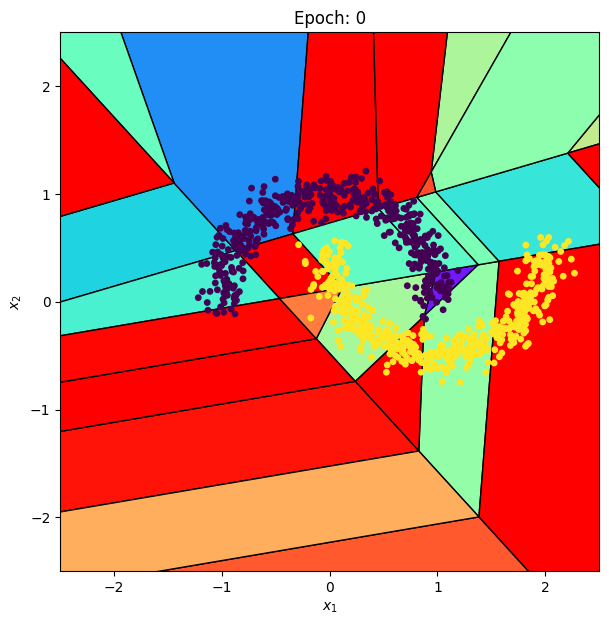

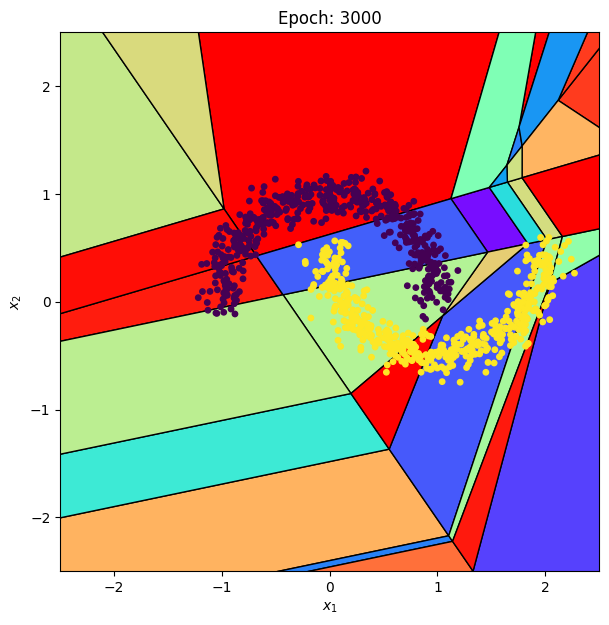

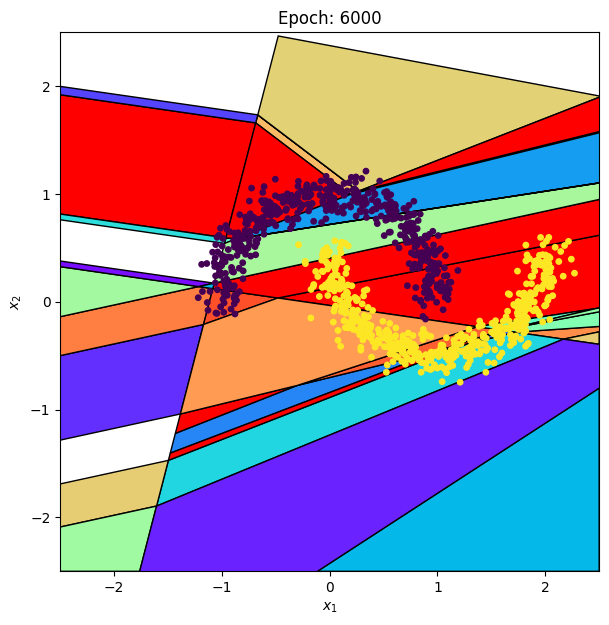

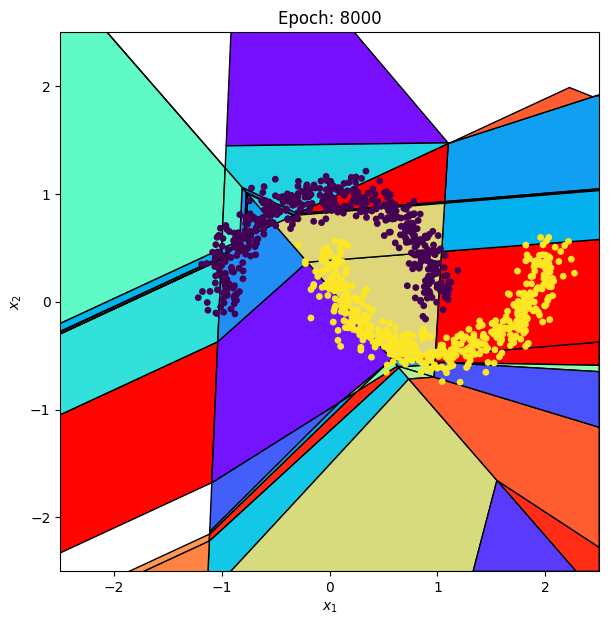

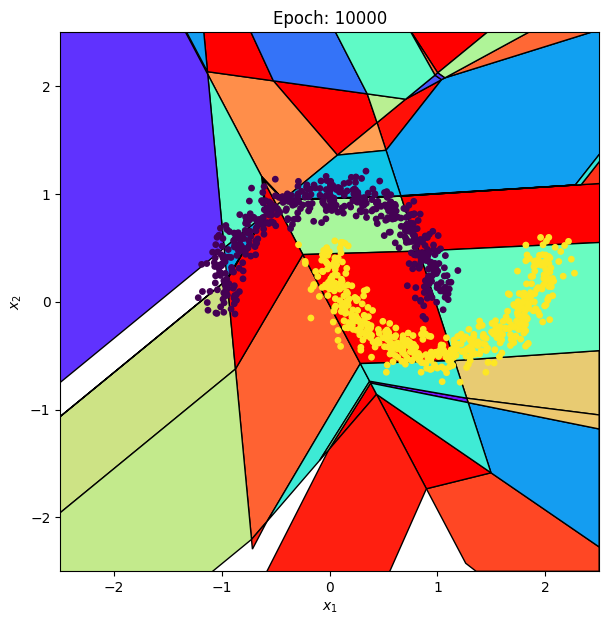

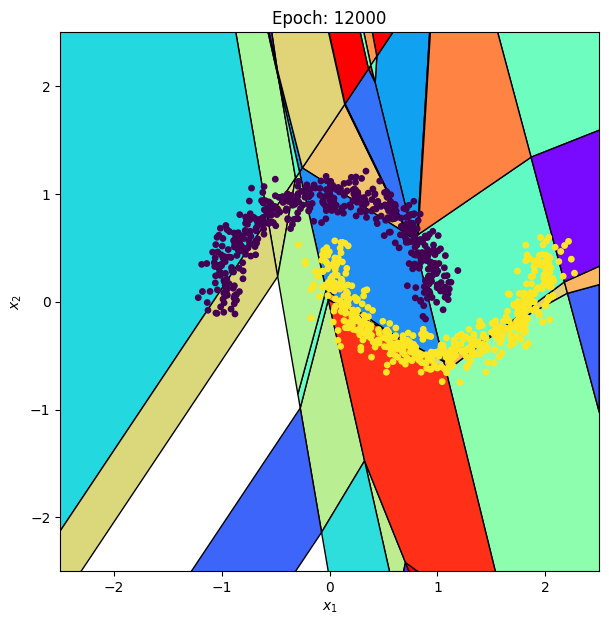

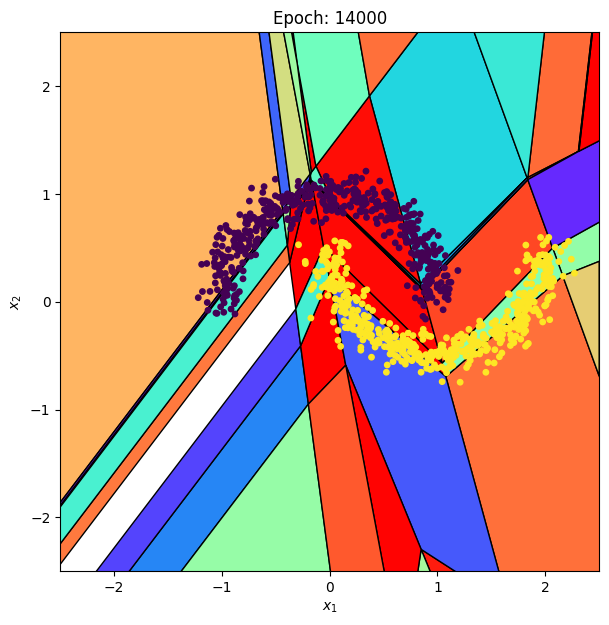

In [6]:
def plot_epoch(epoch, show=True):
    plot_vertices(dict_of_polytopes[f'epoch{epoch}'], epoch=epoch, show=show)

for epoch in [0,3000, 6000, 8000, 10000, 12000, 14000]:
    plot_epoch(epoch)